# Final Project on Supervised Learning

### LAN and WAN Response Analysis 
- Description: The source of our data comes from the variablity of a LAN network when it is connecting to the Internet. The data is collected by the ping response time from the devices of the local internet router and to the first-hop server on the internet.
- Group Members: Eric Topmiller, Viphu Nguyen, David Gigremosa, Paul Rozario

Question to Answer: What is the worst time of day for ping response with ethernet and wireless for both LAN and WAN?

In [2]:
!pip install numpy

  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\VIphu N\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\numpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.



In [1]:

# Import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Set the dataset from the network csv
df = pd.read_csv('ping_data_rp829c7e0e_eth.csv')
df.head()
df.sort_values('timestamp', inplace=True)

### Data Wrangling and Filtering the Data
- Done by Viphu Nguyen and Eric Topmiller

In [3]:
# Finding the missing values from the ping dataset
df.isna().sum()

timestamp      0
location       0
source         0
local_dest     0
local_avg      0
remote_dest    0
remote_avg     0
dtype: int64

In [4]:
# Duplicate the dataframe in case of crashes
df1 = df.copy()

In [21]:
# Removing unncessary columns from the ping dataset
df1 = df1.drop(['location', 'local_dest', 'remote_dest'], axis = 1)
df1

,index,timestamp,source,local_avg,remote_avg,hour,local_delay,remote_delay,ismean,big_remote_avg
0,0,1.559041e+09,ethernet,0.19,8.14,10,Large,Small,0,0
1,1,1.559041e+09,ethernet,0.15,7.75,10,Medium,Small,1,0
2,2,1.559041e+09,ethernet,0.15,8.68,10,Medium,Medium,1,0
3,3,1.559041e+09,ethernet,0.15,8.08,10,Medium,Small,1,0
4,4,1.559041e+09,ethernet,0.15,8.20,10,Medium,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...
64285,69740,1.559691e+09,ethernet,0.15,8.70,23,Medium,Medium,1,0
64286,69741,1.559691e+09,ethernet,0.15,8.43,23,Medium,Medium,1,0
64287,69742,1.559691e+09,ethernet,0.15,8.71,23,Medium,Medium,1,0
64288,69743,1.559691e+09,ethernet,0.15,8.42,23,Medium,Medium,1,0


#### *Each header definition*
- Timestamp: The current time of an event that is recorded
- Source: Network Source
- Local_avg: Response Time for local network (ms)
- Remote_avg: Response time for remote network (ms)

In [22]:
# create a column that is the start of the range of hours of the day, show the head, show it has all 24 hours of the day
#df1['hour'] = (df['timestamp'].astype(int) % 86400) / 14400
df1['hour'] = (df['timestamp'].astype(int) % 86400) / 3600
df1['hour'] = df1['hour'].astype(int)
print(df1.head())
df1['hour'].unique()
print(df1.info())

   index     timestamp    source  local_avg  remote_avg  hour local_delay  \
0      0  1.559041e+09  ethernet       0.19        8.14    10       Large   
1      1  1.559041e+09  ethernet       0.15        7.75    10      Medium   
2      2  1.559041e+09  ethernet       0.15        8.68    10      Medium   
3      3  1.559041e+09  ethernet       0.15        8.08    10      Medium   
4      4  1.559041e+09  ethernet       0.15        8.20    10      Medium   

  remote_delay  ismean  big_remote_avg  
0        Small       0               0  
1        Small       1               0  
2       Medium       1               0  
3        Small       1               0  
4       Medium       1               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64290 entries, 0 to 64289
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           64290 non-null  int64   
 1   timestamp       64290 non-null  float64

In [23]:
# find the quartiles of the time data so we can create local average categorical variable
print(df1['local_avg'].max())
print(df1['remote_avg'].max())
print(df1)

2000.0
2000.0
       index     timestamp    source  local_avg  remote_avg  hour local_delay  \
0          0  1.559041e+09  ethernet       0.19        8.14    10       Large   
1          1  1.559041e+09  ethernet       0.15        7.75    10      Medium   
2          2  1.559041e+09  ethernet       0.15        8.68    10      Medium   
3          3  1.559041e+09  ethernet       0.15        8.08    10      Medium   
4          4  1.559041e+09  ethernet       0.15        8.20    10      Medium   
...      ...           ...       ...        ...         ...   ...         ...   
64285  69740  1.559691e+09  ethernet       0.15        8.70     8      Medium   
64286  69741  1.559691e+09  ethernet       0.15        8.43     8      Medium   
64287  69742  1.559691e+09  ethernet       0.15        8.71     8      Medium   
64288  69743  1.559691e+09  ethernet       0.15        8.42     8      Medium   
64289  69744  1.559691e+09  ethernet       0.15        9.12     8      Medium   

      remote_

count    64290.000000
mean         0.403038
std         18.790955
min          0.140000
25%          0.150000
50%          0.150000
75%          0.150000
max       2000.000000
Name: local_avg, dtype: float64
count    64290.000000
mean        11.971681
std         31.553788
min          4.020000
25%          8.150000
50%          8.540000
75%          9.200000
max       2000.000000
Name: remote_avg, dtype: float64


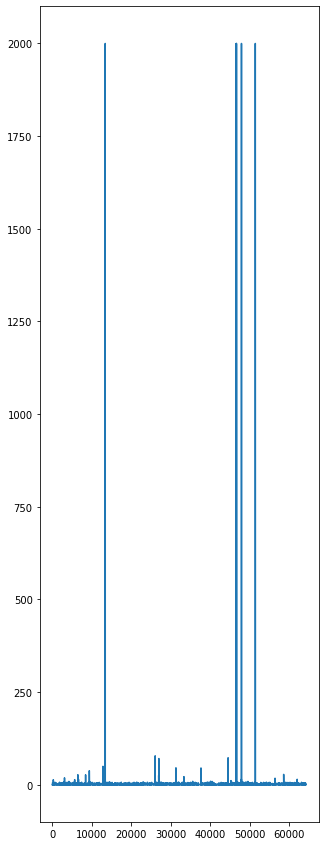

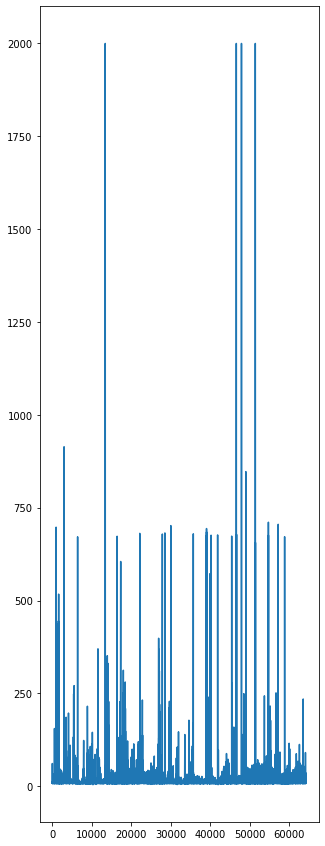

In [24]:
# remove the rows with avg of 9999.9999 since they are failures and will skew the data
df1 = df1[(df1['local_avg'] != 9999.9999) & (df1['remote_avg'] != 9999.9999)]
df1 = df1.reset_index()
print(df1['local_avg'].describe())
print(df1['remote_avg'].describe())
df1['local_avg'].plot(figsize=(5,15))
plt.show()
df1['remote_avg'].plot(figsize=(5,15))
plt.show()

In [25]:
# create the categorical variable local_delay for the local delay of low, average, high
# we will leave in the 9999.9999 since they probably represent failures and should be placed the high
#bins = [float('-inf'), 0.149, 0.151, float('inf')]
bins = [float('-inf'), 0.149, 0.15, float('inf')]
labels = ['Small', 'Medium', 'Large']
df1['local_delay'] = pd.cut(df1['local_avg'], bins=bins, labels=labels)
df1.head()
print(df1['local_delay'].unique())


['Large', 'Medium', 'Small']
Categories (3, object): ['Small' < 'Medium' < 'Large']


In [26]:
# find the quartiles of the time data so we can create local average categorical variable
print(df1['remote_avg'].describe())


count    64290.000000
mean        11.971681
std         31.553788
min          4.020000
25%          8.150000
50%          8.540000
75%          9.200000
max       2000.000000
Name: remote_avg, dtype: float64


In [27]:
# create the categorical variable local_delay for the remote delay of low, average, high
# we will leave in the 9999.9999 since they probably represent failures and should be placed the high
bins = [float('-inf'), 8.15, 9.2, float('inf')]
labels = ['Small', 'Medium', 'Large']
df1['remote_delay'] = pd.cut(df1['remote_avg'], bins=bins, labels=labels)
df1.head()
print(df1['local_delay'].unique())


['Large', 'Medium', 'Small']
Categories (3, object): ['Small' < 'Medium' < 'Large']


In [28]:
# do a categorical variable for ismean for the local_avg because we have a lot
# of them
df1['ismean'] = 0
df1.loc[df1["local_avg"] == 0.15, "ismean"] = 1

In [29]:
# do a categorical variable for large remote_avg greater than 1000 ms
df1['big_remote_avg'] = 0
df1.loc[df1['remote_avg'] >= 1000.0, "big_remote_avg"] = 1

### Data Visualizations 
- Done by Viphu Nguyen

count    64290.000000
mean         0.403038
std         18.790955
min          0.140000
25%          0.150000
50%          0.150000
75%          0.150000
max       2000.000000
Name: local_avg, dtype: float64

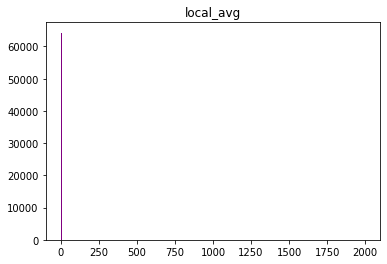

In [30]:
# Histogram for 'local_avg' response time (local) column
df1.hist(column='local_avg', bins=200, grid=False, rwidth=.9, color='purple')
df1['local_avg'].describe()

count    64290.000000
mean        11.971681
std         31.553788
min          4.020000
25%          8.150000
50%          8.540000
75%          9.200000
max       2000.000000
Name: remote_avg, dtype: float64

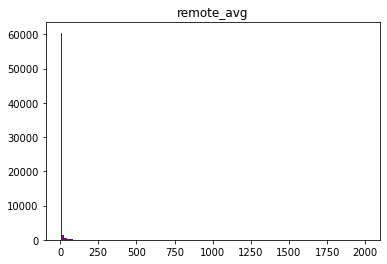

In [31]:
# Histogram for 'remote_avg' response time (local) column
df1.hist(column='remote_avg', bins=200, grid=False, rwidth=.9, color='purple')
df1['remote_avg'].describe()

In [32]:
# Duplicate the dataframe in case of crashes
df2 = df1.copy()

In [33]:
# map the local_delay and remote_delay to integers since that is what is needed by the classifier
df2['local_delay_int'] = df2['local_delay'].map({'Small':0, 'Medium':1, 'Large':2}).astype(int)
df2['remote_delay_int'] = df2['remote_delay'].map({'Small':0, 'Medium':1, 'Large':2}).astype(int)
print(df2['local_delay_int'].unique())
print(df2['remote_delay_int'].unique())
X = df2.drop(['index', 'timestamp', 'source', 'local_avg', 'remote_avg', 'local_delay', 'remote_delay', 'hour'], axis = 1)
y = df2['hour']
print(X.head())
print(y.head())

[2 1 0]
[0 1 2]
   level_0  ismean  big_remote_avg  local_delay_int  remote_delay_int
0        0       0               0                2                 0
1        1       1               0                1                 0
2        2       1               0                1                 1
3        3       1               0                1                 0
4        4       1               0                1                 1
0    10
1    10
2    10
3    10
4    10
Name: hour, dtype: int32


In [34]:
# split out the test and train datasets
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)
print(X_train, y_train)

       level_0  ismean  big_remote_avg  local_delay_int  remote_delay_int
37688    37688       1               0                1                 1
28698    28698       1               0                1                 0
4298      4298       1               0                1                 1
34934    34934       1               0                1                 1
22472    22472       1               0                1                 2
...        ...     ...             ...              ...               ...
42697    42697       1               0                1                 1
36008    36008       1               0                1                 0
46265    46265       1               0                1                 1
23587    23587       1               0                1                 0
29313    29313       0               0                2                 2

[51432 rows x 5 columns] 37688    18
28698    17
4298     23
34934    10
22472    23
         ..
42697     8
36

### Use scikit-learn for Logistic Regression and DecisionTree Classification, XGBoost, Keras, Pytorch to train, test and predict a categorical variable. Use appropriate metric and interpret themeaning of the score

### Logistic Regression

In [35]:
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

In [36]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Intercept [ 0.15363497  0.461891   -0.01806193 -0.03097053 -0.06056214 -0.07201127
 -0.05530374 -0.0857518  -0.16443369 -0.17684835 -0.15975591  0.29479355
 -0.05130031 -0.05151369 -0.05380508 -0.04132861 -0.03825726 -0.03883459
 -0.01021075 -0.03474419 -0.02940612 -0.04603993  0.35465626 -0.04583587]
Coefficients [[-2.23491098e-01 -5.53950684e-02  1.19663185e-01 -8.69509109e-02
   4.27137465e-01]
 [ 5.37164332e-01 -2.71294415e-02  1.10002682e-01 -1.00856942e-02
  -5.05539925e-02]
 [ 7.19214536e-02 -7.44030007e-02 -2.31621819e-02 -6.26721296e-02
  -1.31071635e-02]
 [ 9.23779238e-02 -8.86772748e-02 -2.03469501e-02 -8.67567556e-02
  -1.26357661e-01]
 [ 1.14337419e-01  8.21346232e-02 -1.86038523e-02  8.80759629e-02
  -2.09766237e-01]
 [ 1.26844293e-01  1.51646529e-01 -1.69758873e-02  1.32490679e-01
  -2.67753543e-01]
 [ 1.52135404e-01  4.45896634e-02 -1.81349687e-02  4.65157523e-02
  -2.36440010e-01]
 [ 1.66

In [37]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.09146056929538031
              precision    recall  f1-score   support

           0       0.10      0.60      0.17       705
           1       0.09      0.61      0.15       887
           2       0.00      0.00      0.00       483
           3       0.00      0.00      0.00       491
           4       0.00      0.00      0.00       520
           5       0.00      0.00      0.00       509
           6       0.00      0.00      0.00       490
           7       0.00      0.00      0.00       532
           8       0.00      0.00      0.00       457
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       410
          11       0.00      0.00      0.00       712
          12       0.00      0.00      0.00       491
          13       0.04      0.08      0.06       488
          14       0.00      0.00      0.00       513
          15       0.00      0.00      0.00       492
          16       0.00      0.00      0.00       50

C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318

### Decision Tree
- Done by Viphu Nguyen and Eric Topmiller

In [38]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [39]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9979779125836056

##### Plot a Decision Tree

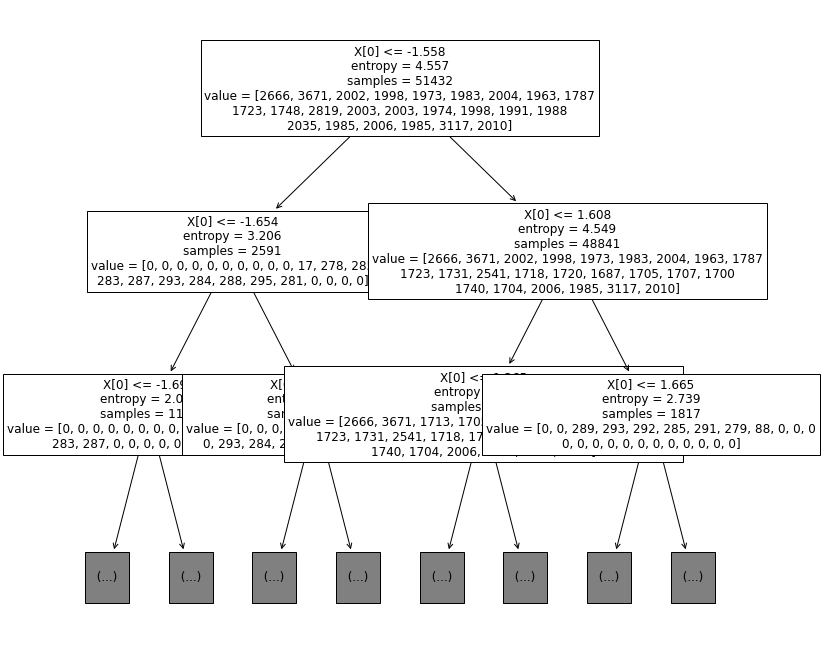

In [40]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 2,fontsize=12);

###  Show feature importance in XGBoost by using xgb.plot.importance

In [41]:
# !pip install xgboost
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.997667


## Keras

In [52]:
#!pip install tensorflow --user
#from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
#from tensorflow.keras.models import Model

## Pytorch on Neural Network

In [127]:
# importing pytorch libraries
# !pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F



In [60]:
df3 = df2.copy()
df3

,level_0,index,timestamp,source,local_avg,remote_avg,hour,local_delay,remote_delay,ismean,big_remote_avg,local_delay_int,remote_delay_int
0,0,0,1.559041e+09,ethernet,0.19,8.14,10,Large,Small,0,0,2,0
1,1,1,1.559041e+09,ethernet,0.15,7.75,10,Medium,Small,1,0,1,0
2,2,2,1.559041e+09,ethernet,0.15,8.68,10,Medium,Medium,1,0,1,1
3,3,3,1.559041e+09,ethernet,0.15,8.08,10,Medium,Small,1,0,1,0
4,4,4,1.559041e+09,ethernet,0.15,8.20,10,Medium,Medium,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64285,64285,69740,1.559691e+09,ethernet,0.15,8.70,8,Medium,Medium,1,0,1,1
64286,64286,69741,1.559691e+09,ethernet,0.15,8.43,8,Medium,Medium,1,0,1,1
64287,64287,69742,1.559691e+09,ethernet,0.15,8.71,8,Medium,Medium,1,0,1,1
64288,64288,69743,1.559691e+09,ethernet,0.15,8.42,8,Medium,Medium,1,0,1,1


In [61]:
cols = ['local_avg', 'remote_avg', 'local_delay', 'remote_delay', ]
df3 = df3[cols]
df3

,local_avg,remote_avg,local_delay,remote_delay
0,0.19,8.14,Large,Small
1,0.15,7.75,Medium,Small
2,0.15,8.68,Medium,Medium
3,0.15,8.08,Medium,Small
4,0.15,8.20,Medium,Medium
...,...,...,...,...
64285,0.15,8.70,Medium,Medium
64286,0.15,8.43,Medium,Medium
64287,0.15,8.71,Medium,Medium
64288,0.15,8.42,Medium,Medium


In [62]:
# Converting the small, medium, and large to [0, 1, 2]
df3['local_delay'].replace({'Small': 0, 'Medium': 1, 'Large': 2}, inplace = True)
df3['remote_delay'].replace({'Small': 0, 'Medium': 1, 'Large': 2}, inplace = True)

C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


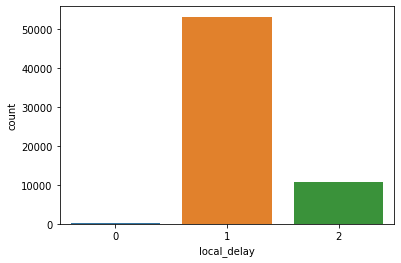

In [63]:
# To display the histogram of how often the response time is for the local delay input network 
sns.countplot(df3.local_delay);

C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


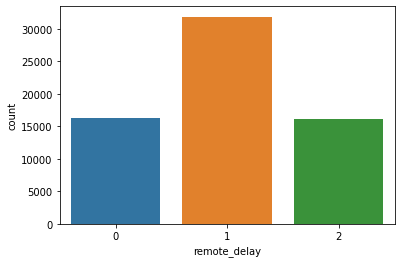

In [64]:
# To display the histogram of how often the response time is for the remote delay input network 
sns.countplot(df3.remote_delay);

In [66]:
# To look at the percentage of how much impact is the response time for local delay 
df3.local_delay.value_counts() / df3.shape[0]

1    0.827578
2    0.169124
0    0.003298
Name: local_delay, dtype: float64

In [67]:
# To look at the percentage of how much impact is the response time for remote delay
df3.remote_delay.value_counts() / df3.shape[0]

1    0.495583
0    0.254534
2    0.249883
Name: remote_delay, dtype: float64

In [117]:
# To split the data into train and test sets:
X = df3[['remote_delay', 'local_avg', 'remote_avg']]
y = df3[['local_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
# Convert all of it to Tensors (so we can use it with PyTorch)
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


NameError: name 'torch' is not defined

### Building a Neural Network

In [119]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

net = Net(X_train.shape[1])
net

Net(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [130]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [123]:
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)


In [124]:
net = net.to(device)

criterion = criterion.to(device)

In [131]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(1000):
    
    y_pred = net(X_train)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)

      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)

      test_loss = criterion(y_test_pred, y_test)

      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(f'''epoch {epoch} Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
            Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
            ''')
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

epoch 0 Train set - loss: -16.428, accuracy: 0.829
            Test  set - loss: -16.995, accuracy: 0.823
            
epoch 100 Train set - loss: -16.463, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 200 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 300 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 400 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 500 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 600 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 700 Train set - loss: -16.466, accuracy: 0.829
            Test  set - loss: -17.048, accuracy: 0.823
            
epoch 800 Train set - loss: -16.46

### Evaluation on the Neural Network (Pytorch)

In [134]:
classes = ['Low', 'Medium', 'Large']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        41
      Medium       0.82      1.00      0.90     10584
       Large       0.00      0.00      0.00      2233

    accuracy                           0.82     12858
   macro avg       0.27      0.33      0.30     12858
weighted avg       0.68      0.82      0.74     12858



C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIphu N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318

### Compare the results of the algorithms (comparison, conclusion, challenges...etc.)

### Outcome of our analysis